<a href="https://colab.research.google.com/github/zhouchun0105/Bitcoin-Price-and-Movement-Prediction/blob/main/Copy_of_LSTM_Part_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part B

---



Import Nesserry Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Part B is the LSTM model which only shows the dates after 2017

In [ ]:
partb = pd.read_csv("bitcoin.csv")


partb['price'] = (partb['High']+ partb['Low'])/2
partb.drop(['Open','Close','Volume_(BTC)','Volume_(Currency)', 'Weighted_Price','High','Low'],axis=1, inplace=True)

partb['Timestamp'] = pd.to_datetime(partb['Timestamp'],unit='s')

partb = partb.set_index('Timestamp')
partb = partb.resample('6H').mean()
partb = partb.dropna()

partb = partb['2017-01-01 00:00:00' :'2021-12-31 23:59:59']


Overall view of dataset

In [ ]:
partb.tail()

,price
Timestamp,
2019-09-21 00:00:00,10132.691867
2019-09-21 06:00:00,10035.510086
2019-09-21 12:00:00,10000.684043
2019-09-21 18:00:00,9984.897523
2019-09-22 00:00:00,9932.605854


View of what the data looks like in plt plot



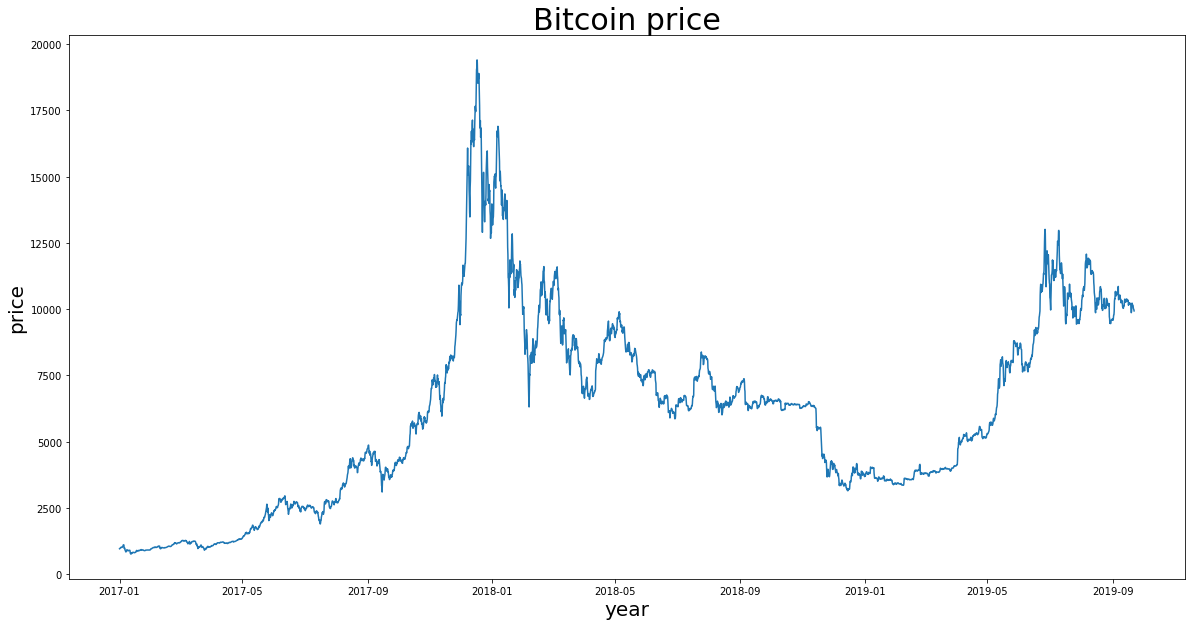

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(partb)
plt.title('Bitcoin price',fontsize=30)
plt.xlabel('year',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.show()

Additional Information about the data for better understanding


In [ ]:
price = partb['price']
max_value = price.max()
min_value = price.min()
avg_value=price.mean()

print(max_value, ' is the maximum  price of bitcoin ')
print(min_value,  ' is the minimum price of bitcoin')
print(avg_value, 'is the average price of bitcoin')


19396.67961111111  is the maximum  price of bitcoin 
763.2702994011972  is the minimum price of bitcoin
6096.163121937933 is the average price of bitcoin


Using Scalar to get values in 0's and 1's for price

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras import models, layers

In [ ]:
scaler = MinMaxScaler()
price = scaler.fit_transform(np.array(partb['price']).reshape(-1,1))
partb['price'] = price

Testing 1 date based on what done above to check if code works. In this test I will predict price for 1 date based on price of 100 dates.

In [ ]:
X_lb = []
y_lb = []
Number = len(partb)
Dates = 100
for i in range(Number-Dates-1):
    X_lb.append(partb.iloc[i:i+Dates])
    y_lb.append(partb.iloc[i+Dates])
    
X = np.array(X_lb)
y = np.array(y_lb)

print(X.shape, y.shape)
# 7073 is the price for 1 day based on 100 days

(3876, 100, 1) (3876, 1)


Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 100)

LSTM Model for Part B Dataset

In [ ]:
m_x = layers.Input(shape = X_train.shape[1:])
m_h = layers.LSTM(10)(m_x)
m_y = layers.Dense(1)(m_h)
m = models.Model(m_x,m_y)
m.compile('adam','mse')
m.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 1)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


Evaluate model (100 times)

In [ ]:
history= m.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),verbose=0)

Show model

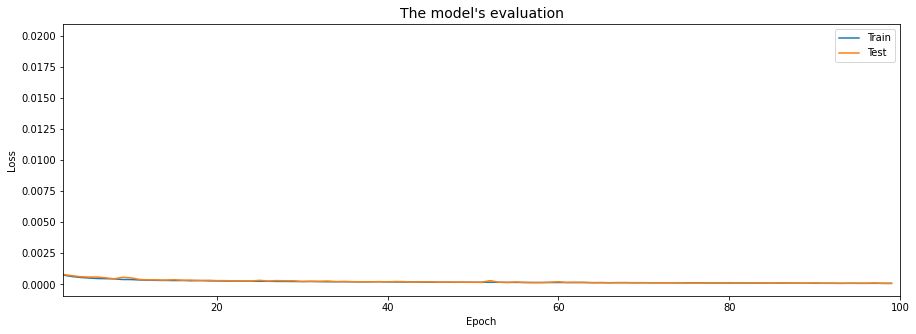

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Test'])
plt.title("The model's evaluation", fontsize=14)
plt.xlabel('Epoch')
plt.xlim(2,100)
plt.ylabel('Loss')
plt.show()

Predict price on 200 values

In [ ]:
pred =[]

pr = m.predict(np.array(partb[-40:]))

pred.append(pr[0])

for i in range(1,40):
    pr = m.predict(np.concatenate((np.array(partb[-40+i:]), pred[:]), axis=0))
    pred.append(pr[0])

for i in range(0,160):
    pr = m.predict(np.concatenate(pred[i:],axis=0).reshape(-1,1))
    pred.append(pr[0])


Plot results

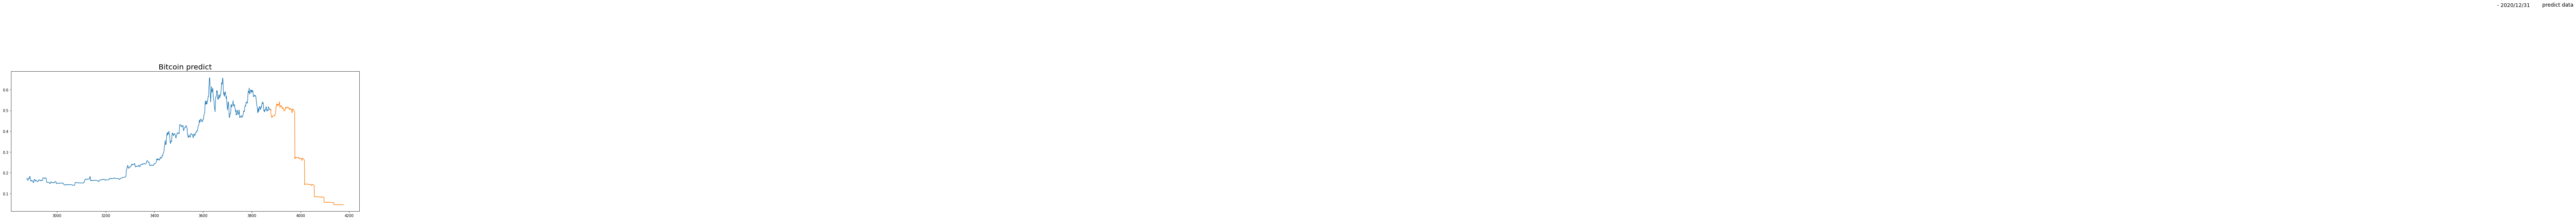

In [ ]:
pred = pd.DataFrame(pred)

pred = pred.reset_index()

pred.columns = ['z','price']

pred.drop(['z'],axis=1,inplace=True)

data = pd.concat([partb.reset_index().drop('Timestamp',axis=1),pred],ignore_index=True)

plt.figure(figsize=(17,7))
plt.plot(data[-1300:-300])
plt.title("Bitcoin predict",fontsize=20)
plt.text(13200,1,"predict data",fontsize=14)
plt.text(13015,1,"- 2020/12/31",fontsize=14)
plt.plot(data[-300:])
plt.show()